# Linear Regression

In [2]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)  # figure szie ı fix lemek için kullanılır
import warnings
warnings.filterwarnings('ignore')   # uyarıların göz ardı edilmesi için

# Read Data Set

In [4]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variables = feature = estimator = attribute = input 

dependent variables = target = label = output

rows: observation - samples


Features: TV - radio - newspaper

Target  : Sales

In [5]:
df.info()   # reflex olrak yapılacak işlerden birisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.head()   # verinin baş kısmına bakalım

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.tail()  # verinin son kısmına bakalım

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.sample(5)  # randomly 5 adet veri satırını görelim

,TV,radio,newspaper,sales
85,193.2,18.4,65.7,15.2
111,241.7,38.0,23.2,21.8
17,281.4,39.6,55.8,24.4
102,280.2,10.1,21.4,14.8
126,7.8,38.9,50.6,6.6


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Correlation

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


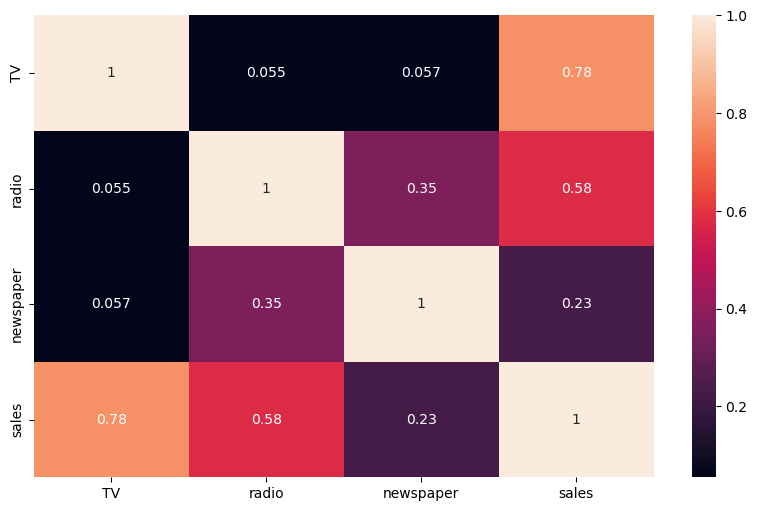

In [11]:
sns.heatmap(df.corr(), annot=True);

#### **multicollinearity nedir?**

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other.

- Multicollinearity varsa featurelarin birbirileriyle iliskileri, korelasyonu fazladir.

- C ve F mesela ikisi de ayni seyi soyluyor bize. ikisi arasindaki iliski cok yuksektir.

- Biz featurelarin korelasyonunun kendi arasinda dusuk, target var ile cok yuksek olmasini isteriz.

- Multicollinearity durumunu istemeyiz, overfitting'e neden olur.

## Create new independent variable (yeni bir feature oluşturalım) feature enginnering

In [12]:
# total_spend = Toplam Harcama

In [13]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [14]:
df = df.iloc[:, [0,1,2,4,3]]    # sales degerini en sona almak için
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


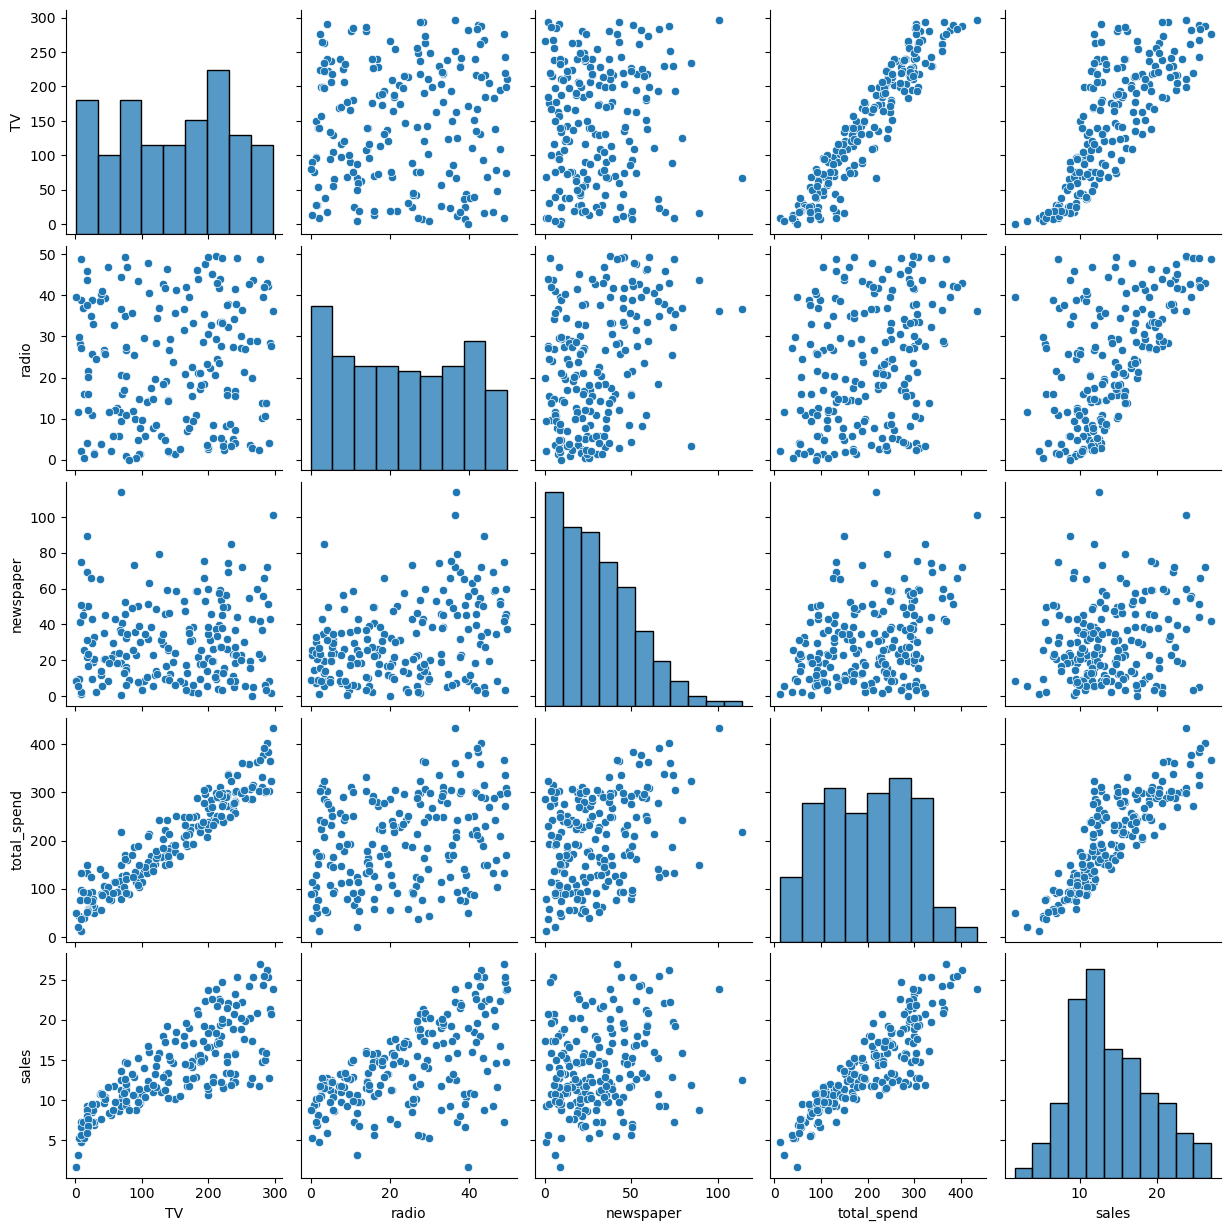

In [15]:
sns.pairplot(df)

In [16]:
#  pip install scipy

In [17]:
import scipy.stats as stats

## Which feature is more suitable for linear regression?

In [18]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616061
corr between sales and radio       : 0.5762225745710551
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017427


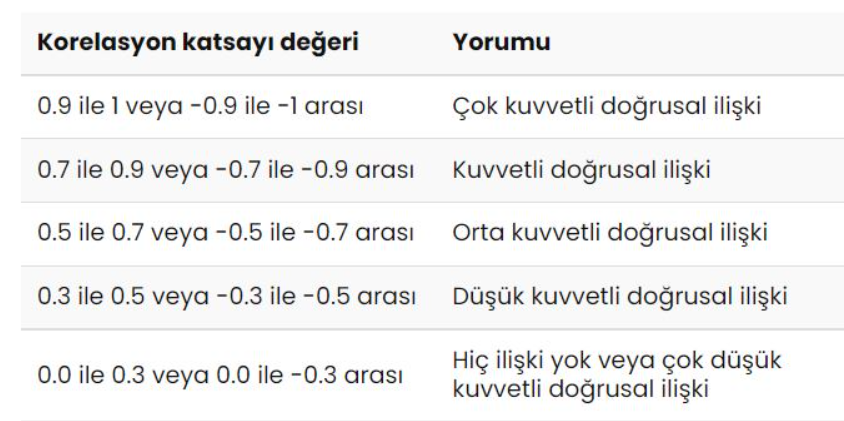

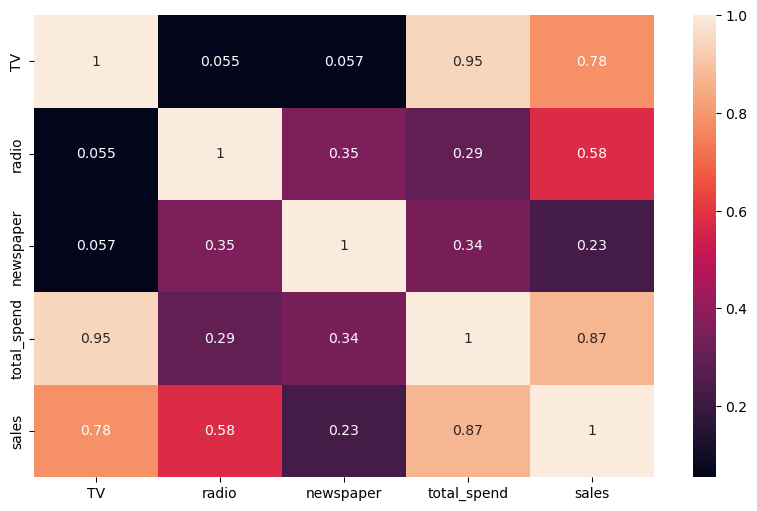

In [19]:
sns.heatmap(df.corr(), annot= True);

In [20]:
# total spend e göre yeni df belirleyelim

df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


<Axes: xlabel='total_spend', ylabel='sales'>

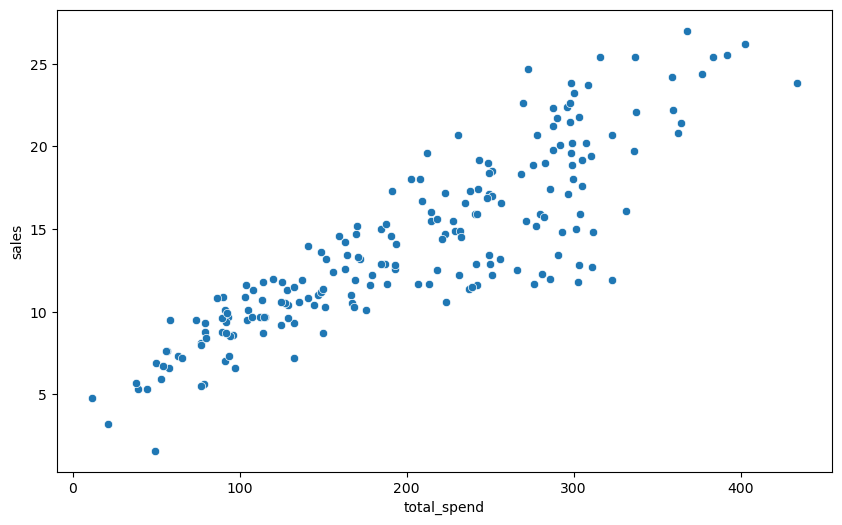

In [21]:
sns.scatterplot(x="total_spend", y = "sales", data=df)

## Correlation between independent variable and dependent variable 

In [22]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017427

In [23]:
df["total_spend"].corr(df["sales"])

0.8677123027017427

## Coefficant of determination (R2)

In [24]:
R2_score = corr**2
R2_score

0.7529246402599608

# Linear Regression

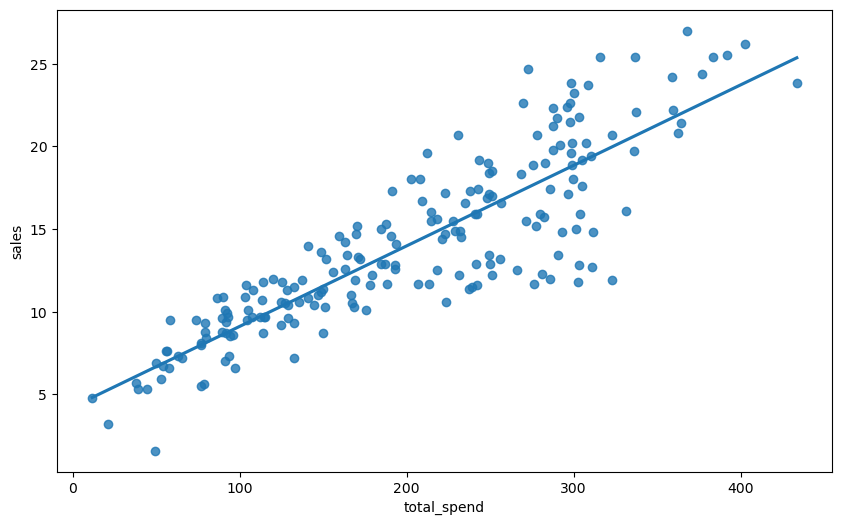

In [25]:
# Least square Error LSE ile Line of Best fit seçimi

sns.regplot(x = "total_spend", y ="sales", data=df, ci=None);

# Spliting the dataset into X (independent variables) and y (dependent variables) 

y = b1 * X + b0
### y = bağımlı değişken = target variable = dependent variable
### b1 = katsayı/eğim, slope -∞ < 0 < +∞
### X = bağımsız değişken /feature, independent variable
### b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

In [27]:
X = df["total_spend"]   # features
y = df["sales"]        # target variable

y_pred = b1X + b0

b1 = total_spend yani x'in katsayısı

b0 = X  sıfır iken y nin aldığı değer 

In [28]:
# içine ind. ve dep. variable verdiğimde ve derecesini belirttiğimde denklemin katsayılarını verecek

np.polyfit(X, y, deg=1)   # sadece simle linear reg. için bugunlük kullanacağız

array([0.04868788, 4.24302822])

In [ ]:
# ustteki sonuclar için ilk deger X'in katsayıdır  - b1: slope
# 2.deger intercept değeridir - b0

# y = 0.048*X + 4.243

## Determination of coefficients (slopes and intercept)

In [29]:
slope, intercept = np.polyfit(X, y, deg=1)

In [30]:
print("slope       :", slope)
print("intercept   :", intercept)

slope       : 0.04868787931904817
intercept   : 4.243028216036326


In [31]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [32]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.04868787931904817
b0 : 4.243028216036326


In [33]:
# y_pred i formulize edelim
y_pred = b1*X + b0

In [34]:
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

actual                 = y               = gerçek değer

predicted              = y_pred          = tahmin değeri

residual               = y - y_pred      = gerçek değer ve tahmin edilen arasındaki fark (error'ler)

LSE (Least Square Eror) = (y - y_pred)^2  = gerçek değer ve tahmin edilen arasındaki farkın karesi=En küçük kareler

In [35]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [36]:
df_2.residual.sum().round()

-0.0

In [37]:
df_2.LSE

0       2.085967
1       0.014136
2       1.930164
3       4.087302
4      12.355211
         ...    
195     0.416098
196     0.056469
197     0.680926
198     4.757026
199     8.914914
Name: LSE, Length: 200, dtype: float64

In [38]:
df_2.LSE.sum()

1338.4439761715594

# Prediction with simple linear regression

In [ ]:
# X = potansiyel harcamaları ifade etsin - potential_spend
# y_pred = b1X + b0

# 0 dan 500 e 100 eşit parçaya bölmek için linspace kullanalaım

In [39]:
potential_spend = np.linspace(0,500,100)   # potansiyel harcama
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [40]:
predicted_sales_lin = b1*potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

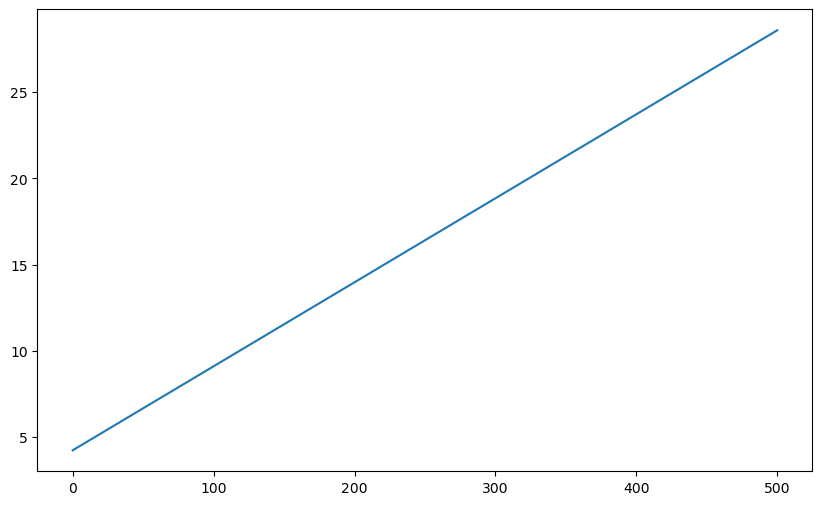

In [43]:
plt.plot(potential_spend, predicted_sales_lin)

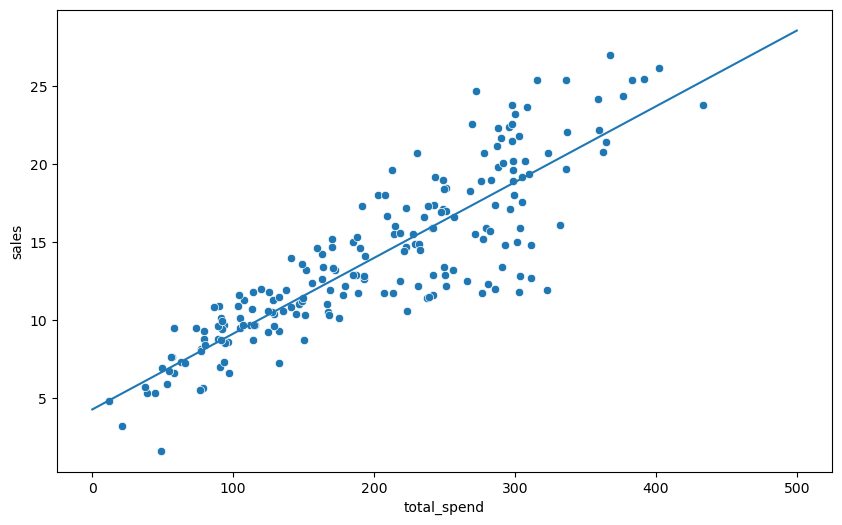

In [44]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x="total_spend", y ="sales", data=df);

# How can we improve our predictions? 

y = b1 * x + b0  => simple linear

y = a1 * x**3 + a2 * x**2 + a3*x + a0 => 3 degree polinominal

POLINOM DERECESİNİ ARTIRARAK TAHMİN MODELİNİ GELİŞTİREBİİRİZ (Model Complexity)

In [45]:
a = np.polyfit(X, y, deg=3)
a

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

fonksiyonun döndürdüğü sonuçlar polinom katsayılarını verir.. eğer çıktı [a, b, c, d] şeklindeyse, bu, bulunan en iyi uyan polinomun y = aX^3 + bX^2 + c*X + d şeklinde olduğunu gösterir.

In [48]:
a1 = np.polyfit(X, y, deg=3)[0]   # x^3 teriminin katsayısı
a2 = np.polyfit(X, y, deg=3)[1]   # x^2 teriminin katsayısı
a3 = np.polyfit(X, y, deg=3)[2]   # x teriminin katsayısı
a0 = np.polyfit(X, y, deg=3)[3]   # sabit terim

In [ ]:
# üstteki kod için ilave bir çözüm de alttaki gibi olabilir

# coefficients = np.polyfit(X, y, deg = 3)
# a1 = coefficients[0]
# a2 = coefficients[1]
# a3 = coefficients[2]
# a0 = coefficients[3]

In [50]:
# polynom fonksiyon için tahminleri oluşturalım

predicted_sales_poly = a1*potential_spend**3 + a2*potential_spend**2+a3*potential_spend + a0
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

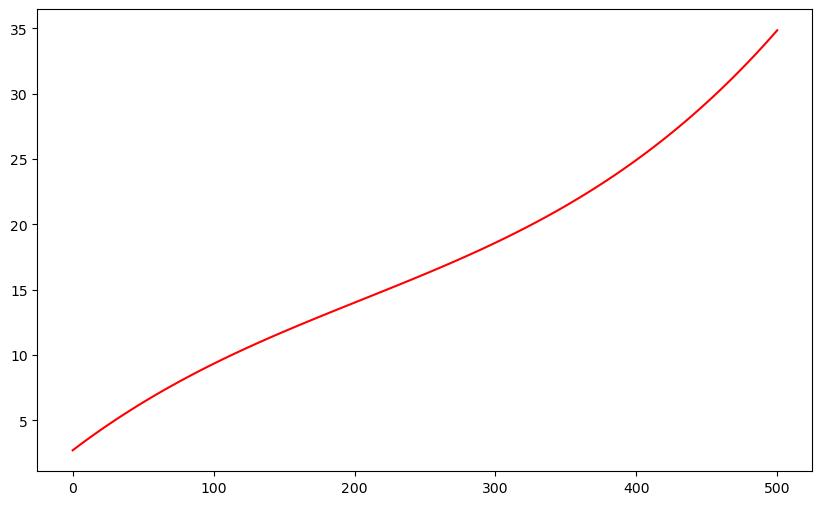

In [51]:
plt.plot(potential_spend, predicted_sales_poly, color = "red");

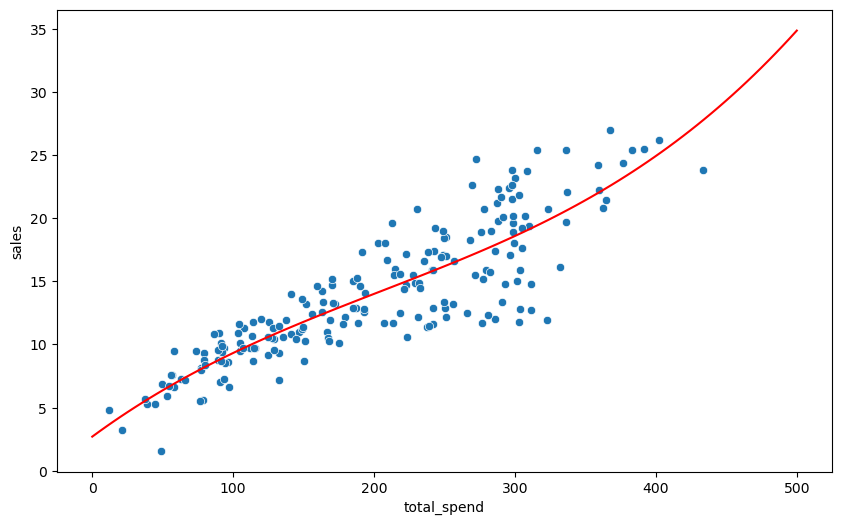

In [52]:
plt.plot(potential_spend, predicted_sales_poly, color = "red")
sns.scatterplot(x ="total_spend", y = "sales", data = df);

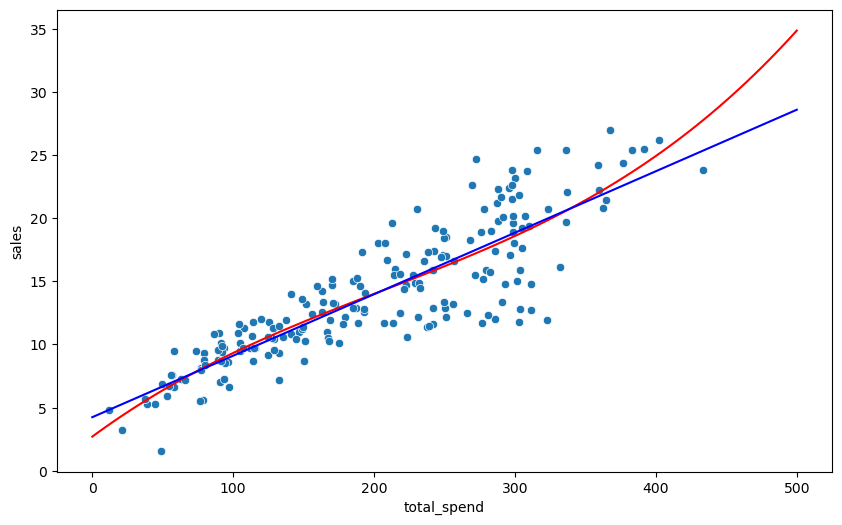

In [53]:
plt.plot(potential_spend, predicted_sales_poly, color = "red")
plt.plot(potential_spend, predicted_sales_lin, color = "blue")
sns.scatterplot(x ="total_spend", y = "sales", data = df);


In [54]:
spend = 400
sales_pred_lin = b1 * spend + b0
sales_pred_poly = a1*spend**3 + a2*spend**2 + a3*spend + a0

print(sales_pred_lin, sales_pred_poly)

23.718179943655596 24.924972837670715


In [ ]:
## eğer modelin derecesini 10 yaparsak ne kadar geliştirebiiriz ?

In [55]:
z = np.polyfit(X, y, deg = 10)
z

array([ 6.67309448e-22, -1.55302263e-18,  1.55709566e-15, -8.80932006e-13,
        3.09228006e-10, -6.96944571e-08,  1.00770252e-05, -9.04757494e-04,
        4.66842972e-02, -1.11524546e+00,  1.28231877e+01])

In [56]:

z1 = np.polyfit(X, y, deg = 10)[0]
z2 = np.polyfit(X, y, deg = 10)[1]
z3 = np.polyfit(X, y, deg = 10)[2]
z4 = np.polyfit(X, y, deg = 10)[3]
z5 = np.polyfit(X, y, deg = 10)[4]
z6 = np.polyfit(X, y, deg = 10)[5]
z7 = np.polyfit(X, y, deg = 10)[6]
z8 = np.polyfit(X, y, deg = 10)[7]
z9 = np.polyfit(X, y, deg = 10)[8]
z10= np.polyfit(X, y, deg = 10)[9]
z0 = np.polyfit(X, y, deg = 10)[10]

In [57]:
pred_lin = b1 * X + b0
pred_poly = z1 * X **10 + z2 * X **9 + z3 * X **8 + z4 * X **7 + z5 * X **6 + z6 * X **5 +z7 * X **4 + z8 * X **3 + z9 * X **2+ z10 * X + z0

print(pred_lin, pred_poly)

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64 0      20.631108
1      10.670063
2      10.853159
3      16.163346
4      16.105807
         ...    
195     6.727232
196     9.652896
197    13.826291
198    25.891229
199    16.079354
Name: total_spend, Length: 200, dtype: float64


In [58]:
values = {"actual": y, "predicted":pred_poly, "resudial": y - pred_poly, "LSE" : (y - pred_poly)**2}
df_pol = pd.DataFrame(values)
df_pol

,actual,predicted,resudial,LSE
0,22.1,20.631108,1.468892,2.157644
1,10.4,10.670063,-0.270063,0.072934
2,9.3,10.853159,-1.553159,2.412301
3,18.5,16.163346,2.336654,5.459951
4,12.9,16.105807,-3.205807,10.277196
...,...,...,...,...
195,7.6,6.727232,0.872768,0.761725
196,9.7,9.652896,0.047104,0.002219
197,12.8,13.826291,-1.026291,1.053273
198,25.5,25.891229,-0.391229,0.153060


In [59]:
df_pol.LSE.sum()

1281.9676290630368

In [60]:
# lineerdeki sonucları hatırlayalım
values_lin = {"actual": y, "predicted":pred_lin, "resudial": y - pred_lin, "LSE" : (y - pred_lin)**2}
df_lin = pd.DataFrame(values_lin)
df_lin

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [61]:
df_lin.LSE.sum()

1338.4439761715594